In [1]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
import yellowbrick

In [112]:
# Read the CSV file into a Pandas DataFrame
credit_data_df = pd.read_csv(
    Path('cleaned_data_v2.csv')   
)

# Review the DataFrame
credit_data_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,3,7,11.27,...,_,809.98,26.82,22.1,No,49.57,80.42,High_spent_Small_value_payments,312.49,Good
1,23,Scientist,19114.12,3,4,3,4,5,4,6.27,...,Good,809.98,31.38,22.3,No,49.57,199.46,Low_spent_Small_value_payments,223.45,Good
2,23,Scientist,19114.12,3,4,3,4,3,8,11.27,...,Good,809.98,22.54,22.6,No,49.57,178.34,Low_spent_Small_value_payments,244.57,Good
3,28,_______,34847.84,2,4,6,1,3,4,5.42,...,Good,605.03,24.46,26.6,No,18.82,104.29,Low_spent_Small_value_payments,470.69,Standard
4,28,Teacher,34847.84,2,4,6,1,7,1,7.42,...,Good,605.03,38.55,26.7,No,18.82,40.39,High_spent_Large_value_payments,484.59,Good


In [113]:
# rename columns for graph
credit_data_df.rename(columns={
    'Age': 'Age',
    'Occupation': 'Occupation',
    'Annual_Income': '$',
    'Num_Bank_Accounts': 'bank',
    'Num_Credit_Card': 'cc',
    'Interest_Rate': 'int',
    'Num_of_Loan': 'loan',
    'Delay_from_due_date': '8',
    'Num_of_Delayed_Payment': '9',
    'Changed_Credit_Limit': '10',
    'Num_Credit_Inquiries': '11',
    'Credit_Mix': 'Credit_Mix',
    'Outstanding_Debt': '13',
    'Credit_Utilization_Ratio': '14',
    'Credit_History_Age': '15',
    'Payment_of_Min_Amount': 'Payment_of_Min_Amount',
    'Total_EMI_per_month': 'Total_EMI_per_month',
    'Amount_invested_monthly': '18',
    'Payment_Behaviour': 'Payment_Behaviour',
    'Monthly_Balance': '20',
    'Credit_Score': 'Credit_Score'
}, inplace=True)


In [114]:
credit_data_df.drop(columns=['Occupation'], inplace=True)
credit_data_df.drop(columns=['Total_EMI_per_month'], inplace=True)
credit_data_df.drop(columns=['Payment_Behaviour'], inplace=True)
credit_data_df.drop(columns=['Payment_of_Min_Amount'], inplace=True)
credit_data_df.drop(columns=['Credit_Mix'], inplace=True)
credit_data_df.drop(columns=['20'], inplace=True)

credit_data_df

,Age,$,bank,cc,int,loan,8,9,10,11,13,14,15,18,Credit_Score
0,23,19114.12,3,4,3,4,3,7,11.27,4,809.98,26.82,22.1,80.42,Good
1,23,19114.12,3,4,3,4,5,4,6.27,4,809.98,31.38,22.3,199.46,Good
2,23,19114.12,3,4,3,4,3,8,11.27,4,809.98,22.54,22.6,178.34,Good
3,28,34847.84,2,4,6,1,3,4,5.42,2,605.03,24.46,26.6,104.29,Standard
4,28,34847.84,2,4,6,1,7,1,7.42,2,605.03,38.55,26.7,40.39,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49518,28,20002.88,10,8,29,5,33,25,18.31,9,3571.70,28.51,6.0,213.98,Standard
49519,29,20002.88,10,8,29,5,33,25,18.31,9,3571.70,37.14,6.2,34.66,Standard
49520,25,39628.99,4,6,7,2,20,6,9.50,3,502.38,39.32,31.4,140.58,Poor
49521,25,39628.99,4,6,7,2,23,7,11.50,3,502.38,34.66,31.5,60.97,Poor


In [115]:
# Seperate the features, X,  from the target variable, y
y = credit_data_df['Credit_Score']
X = credit_data_df.drop(columns='Credit_Score')

In [116]:
# Preview the features data
X.head()

,Age,$,bank,cc,int,loan,8,9,10,11,13,14,15,18
0,23,19114.12,3,4,3,4,3,7,11.27,4,809.98,26.82,22.1,80.42
1,23,19114.12,3,4,3,4,5,4,6.27,4,809.98,31.38,22.3,199.46
2,23,19114.12,3,4,3,4,3,8,11.27,4,809.98,22.54,22.6,178.34
3,28,34847.84,2,4,6,1,3,4,5.42,2,605.03,24.46,26.6,104.29
4,28,34847.84,2,4,6,1,7,1,7.42,2,605.03,38.55,26.7,40.39


In [117]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [118]:
# Review the features data
X.head()

,Age,$,bank,cc,int,loan,8,9,10,11,13,14,15,18
0,23,19114.12,3,4,3,4,3,7,11.27,4,809.98,26.82,22.1,80.42
1,23,19114.12,3,4,3,4,5,4,6.27,4,809.98,31.38,22.3,199.46
2,23,19114.12,3,4,3,4,3,8,11.27,4,809.98,22.54,22.6,178.34
3,28,34847.84,2,4,6,1,3,4,5.42,2,605.03,24.46,26.6,104.29
4,28,34847.84,2,4,6,1,7,1,7.42,2,605.03,38.55,26.7,40.39


In [119]:
# Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [120]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [121]:
# Import the KNeighborsClassifier module from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier model with n_neighbors = 7 
knn = KNeighborsClassifier(n_neighbors=7)

In [122]:
# Train the model using the training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [123]:
# Create predictions using the testing data
y_pred = knn.predict(X_test_scaled)

In [124]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.55      0.54      0.54      2225
        Poor       0.71      0.65      0.68      3458
    Standard       0.72      0.75      0.74      6698

    accuracy                           0.69     12381
   macro avg       0.66      0.65      0.65     12381
weighted avg       0.69      0.69      0.69     12381



In [125]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[1197,  201,  792],
       [  71, 2256,  864],
       [ 957, 1001, 5042]])

In [68]:
from yellowbrick.features import rank2d

X, _ = X
visualizer = rank2d(X)

ValueError: too many values to unpack (expected 2)

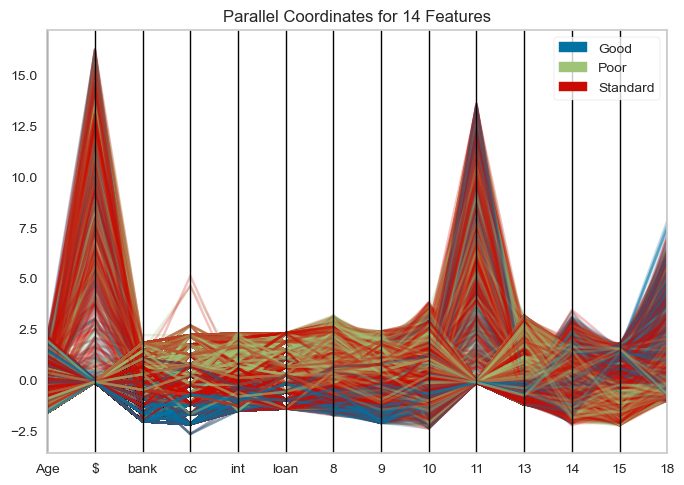

In [126]:
from yellowbrick.features import parallel_coordinates

visualizer = parallel_coordinates(X, y, normalize="standard")